# MTH0005M 
Below is a full run-through of the code created during Python sessions 1, 2 and 3.

In [ ]:
from google.colab import files
from IPython.display import Image
upload = files.upload()

Saving Red_Admiral_Data.xlsx to Red_Admiral_Data.xlsx


## Summary Statistics

In [ ]:
'''
This script will calculate six summary statistics;
arithmetic mean, median, mode, range, standard deviation, interquartile range
'''

import scipy.stats as stats
import numpy as np
import pandas as pd

#Load Excel data
data = pd.read_excel("Red_Admiral_Data.xlsx", usecols="B").to_numpy()

#Calculate summary statistics
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)
rang = np.amax(data) - np.amin(data)
stdev = np.std(data)
iqr = np.percentile(data,75) - np.percentile(data,25)

#Print summary stastics
print("mean=", mean)
print("median=", median)
print("mode=", mode)
print("range=", rang)
print("stdev=", stdev)
print("iqr=", iqr)

mean= 53.075
median= 50.45
mode= ModeResult(mode=array([[52.5]]), count=array([[2]]))
range= 35.300000000000004
stdev= 8.271147139302988
iqr= 8.999999999999993


## Plot a  Histogram

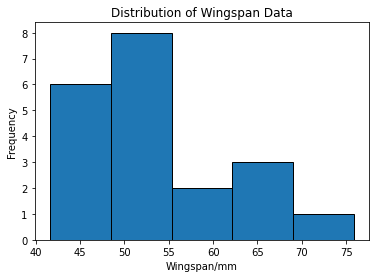

In [ ]:
'''
This script will produce a histogram of the data provided.
'''

import matplotlib.pyplot as plt
import pandas as pd

#Read Excel data
x = pd.read_excel("Red_Admiral_Data.xlsx", usecols="C").to_numpy()

#Produce histogram plot
plt.hist(x, bins = 5, edgecolor='black') 
plt.title('Distribution of Wingspan Data') 
plt.xlabel('Wingspan/mm') 
plt.ylabel('Frequency')
plt.style.use('ggplot')
plt.show()

## Calculate Normal Probabilities

In [ ]:
'''
This script will produce probabilities for normal distributed data in three different cases.
'''

import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import statistics

#Read Excel data
x = pd.read_excel("Red_Admiral_Data.xlsx", usecols="D").to_numpy().T
x=x[0,:]

#Calculate statistics
mu = np.mean(x)                #Calculate mean
variance = np.var(x)           #Calculate variance
sigma = math.sqrt(variance)    #Calculate standard deviation
print(sigma)
print(np.std(x))
print(statistics.stdev(x))
print(statistics.pstdev(x))

#Calculate P(X<x)
def lessthan(x):
    probabilitylessthan = stats.norm.cdf(x, mu, sigma)
    return(probabilitylessthan) 

#Calculate P(X>x)
def morethan(x):
    probabilitymorethan = 1 - lessthan(x)
    return(probabilitymorethan)

#Calculate P(x1<X<x2)
def between(x1, x2):
    if x1>=x2:
        print("x1 should be lower than x2")
    else:
      probabilitybetween = lessthan(x2) - lessthan(x1)
      return(probabilitybetween) 

0.05181061667264732
0.05181061667264732
0.0531565711143183
0.05181061667264732


In [ ]:
print(lessthan(0.2))
print(between(0.2,0.3))
print(morethan(0.3))

0.017198081604009638
0.40930262690841057
0.5734992914875798


## Expected Frequencies from Normal Distribution

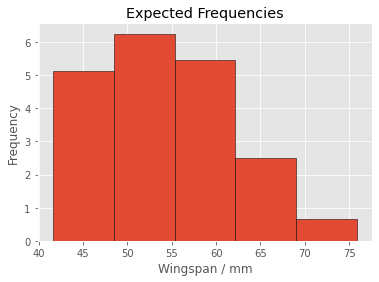

In [ ]:
'''
This script will calculate the expected frequencies from a normal distribution.
'''

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd

#Dataset and number of bins
x = pd.read_excel("Red_Admiral_Data.xlsx", usecols="C").to_numpy()
numberofbins = 5

#Calculate statistics
mu = np.mean(x)                #Calculate mean
variance = np.var(x)           #Calculate variance
sigma = math.sqrt(variance)    #Calculate standard deviation

#Produce bin limits
y = np.linspace(np.min(x),np.max(x),numberofbins+1)

#Calculate expected frequencies
expectedfrequencies = np.zeros((numberofbins, 2))                        #Produce array for inputting
expectedfrequencies[0,0]=y[0]                                            #Input first lower limit
expectedfrequencies[0,1]=stats.norm.cdf(y[1], mu, sigma) * len(x)        #Calculate first expected frequency

for i in range(1, numberofbins - 1):                                                              
   expectedfrequencies[i,0]=y[i]                                         #Input interior lower limits
   expectedfrequencies[i,1]=(stats.norm.cdf(y[i+1], mu, sigma) -  
                             stats.norm.cdf(y[i], mu, sigma)) * len(x)   #Calculate interior expected frequencies
   
expectedfrequencies[numberofbins-1,0]=y[numberofbins-1]                  #Input final lower limit
expectedfrequencies[numberofbins-1,1]=((1 - stats.norm.cdf(
                                       y[numberofbins-1], mu, sigma))
                                       * len(x))                         #Calculate final expected frequency

#Plotting the Expected Frequencies
width = y[2]-y[1]
plt.bar(expectedfrequencies[:,0], expectedfrequencies[:,1],width, align='edge', edgecolor='black')
plt.title('Expected Frequencies')
plt.xlabel('Wingspan / mm')
plt.ylabel('Frequency')
plt.style.use('ggplot')
plt.show()

## Chi-squared Goodness of Fit

In [ ]:
import scipy.stats as stats

expected = [3.74, 6.25, 5.45, 2.49, 0.592]           #Input expected values
observed = [6, 8, 2, 3, 1]                           #Input observed values

x = stats.chisquare(f_obs=observed, f_exp=expected)  #Calculate chi-squared value and p value

print(x)

Power_divergenceResult(statistic=4.4252604238407915, pvalue=0.3515018763487161)


## Students Paired t-Test

In [ ]:
import numpy as np
import scipy.stats as stats
import math
import pandas as pd

#Datasets
dataset1 = pd.read_excel("Red_Admiral_Data.xlsx", usecols="B").to_numpy()
dataset2 = pd.read_excel("Red_Admiral_Data.xlsx", usecols="C").to_numpy()

#Calculate statistics
differences = np.subtract(dataset1,dataset2)    #Calculate differences
mu = np.mean(differences)                       #Calculate mean
variance = np.var(differences)                  #Calculate variance
sigma = math.sqrt(variance)                     #Calculate standard deviation
sqrtn = math.sqrt(len(differences))             #Calculate sqrt of n
t = (mu*sqrtn)/sigma                            #Calculate t

#Print statistics
print("mu=", mu)
print("stdev=", sigma)
print("t=",t)

mu= -0.8
stdev= 0.7483314773547883
t= -4.780914437337574


## Students Unpaired t-Test

In [ ]:
import numpy as np
import scipy.stats as stats
import math
import pandas as pd

#Datasets
dataset1 = pd.read_excel("Red_Admiral_Data.xlsx", sheet_name = 0, usecols="B").to_numpy()
dataset2 = pd.read_excel("Red_Admiral_Data.xlsx", sheet_name = 1, usecols="B").to_numpy()

#Calculate statistics
mu_1 = np.mean(dataset1)                             #Calculate mean of dataset 1
var_1 = np.var(dataset1)                             #Calculate variance of dataset 1
n_1 = len(dataset1)                                  #Calculate n in set 1
mu_2 = np.mean(dataset2)                             #Calculate mean of dataset 2
var_2 = np.var(dataset2)                             #Calculate variance of dataset 2
n_2 = len(dataset2)                                  #Calculate n in set 2
t = (mu_1-mu_2)/np.sqrt(((var_1/n_1)+(var_2/n_2)))   #Calculate t

#Print statistics
print("mu_1=", mu_1, "mu_2=", mu_2)
print("var_1=", var_1, "var_2=", var_2)
print("n_1=", n_1, "n_2=", n_2)
print("t=",t)


mu_1= 53.075 mu_2= 50.9
var_1= 68.411875 var_2= 62.14875000000001
n_1= 20 n_2= 16
t= 0.8047340959708877


## Pearson's Correlation Coefficient

In [ ]:
import numpy as np
import scipy.stats as stats
import math
import pandas as pd

#Data
df = pd.read_excel("Red_Admiral_Data.xlsx", sheet_name = 0, usecols="B, D").to_numpy().T
x = df[0,:]
y = df[1,:]

#Calculate r
r=stats.pearsonr(x,y)

print("r=",r[0])

r= 0.4365355711325759


## Scatter-plot and Regression Line

0.002734466786650709 0.16446817529851365


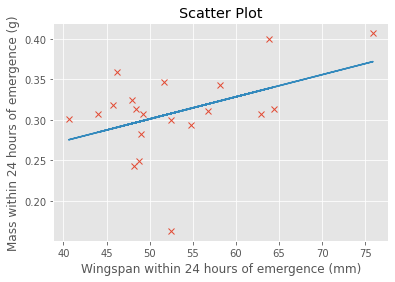

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load data
df = pd.read_excel("Red_Admiral_Data.xlsx", sheet_name = 0, usecols="B, D").to_numpy().T
x = df[0,:]
y = df[1,:]

#Plot 
plt.plot(x,y,'x')                                            #Plot co-ordinates with 'x'
m, b = np.polyfit(x,y,1) 
print(m , b)                                    #Produce linear regression equation
plt.plot(x, m*x+b)                                           #Plot linear regression
plt.title('Scatter Plot')                                    #Add title
plt.xlabel('Wingspan within 24 hours of emergence (mm)')     #Add x label based on first header
plt.ylabel('Mass within 24 hours of emergence (g)')          #Add y label based on second header
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

#Load data
df = pd.read_excel("Red_Admiral_Data.xlsx", sheet_name = 0, usecols="B, D").to_numpy().T
x = df[0,:]
y = df[1,:]

sigmay = statistics.pstdev(y)
sigmax = statistics.pstdev(x)
r=stats.pearsonr(x,y)

Beta = r[0] * (sigmay / sigmax)

Alpha = np.mean(y) - (Beta * np.mean(x))

print(Beta)
print(Alpha)


0.0027344667866507104
0.1644681752985135


## Spearman's Correlation Coefficient

In [ ]:
import numpy as np
import scipy.stats as stats
import math
import pandas as pd

#Datasets
df = pd.read_excel("Red_Admiral_Data.xlsx", sheet_name = 0, usecols="B, D").to_numpy().T
x = df[0,:]
y = df[1,:]

#Calculate r
r=stats.spearmanr(x,y)

print("r=",r[0])

r= 0.23587065221912543
